In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

In [5]:
train_data = pd.read_csv(r'c:\Users\Asus\Documents\ДС\Хакатон\Практикум_27_12_2023\train.csv')

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [7]:
# Статистика чиловых фичей
numerical_descriptive = train_data.describe()

# Статистика категориальных фичей
categorical_descriptive = train_data.describe(include='object')

numerical_descriptive

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [8]:
categorical_descriptive

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data,outcome
count,1235,1235,1196,1175,1214,1229,1191,1215,1212,1155,1214,1045,1022,1187,1235,1235,1235
unique,2,2,4,4,6,3,6,5,4,3,4,5,5,3,2,2,3
top,yes,adult,cool,reduced,pale_pink,less_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,absent,distend_small,serosanguious,yes,yes,lived
freq,887,1160,700,724,284,834,429,664,543,758,604,493,482,570,929,668,574


# Изучим числовые признаки

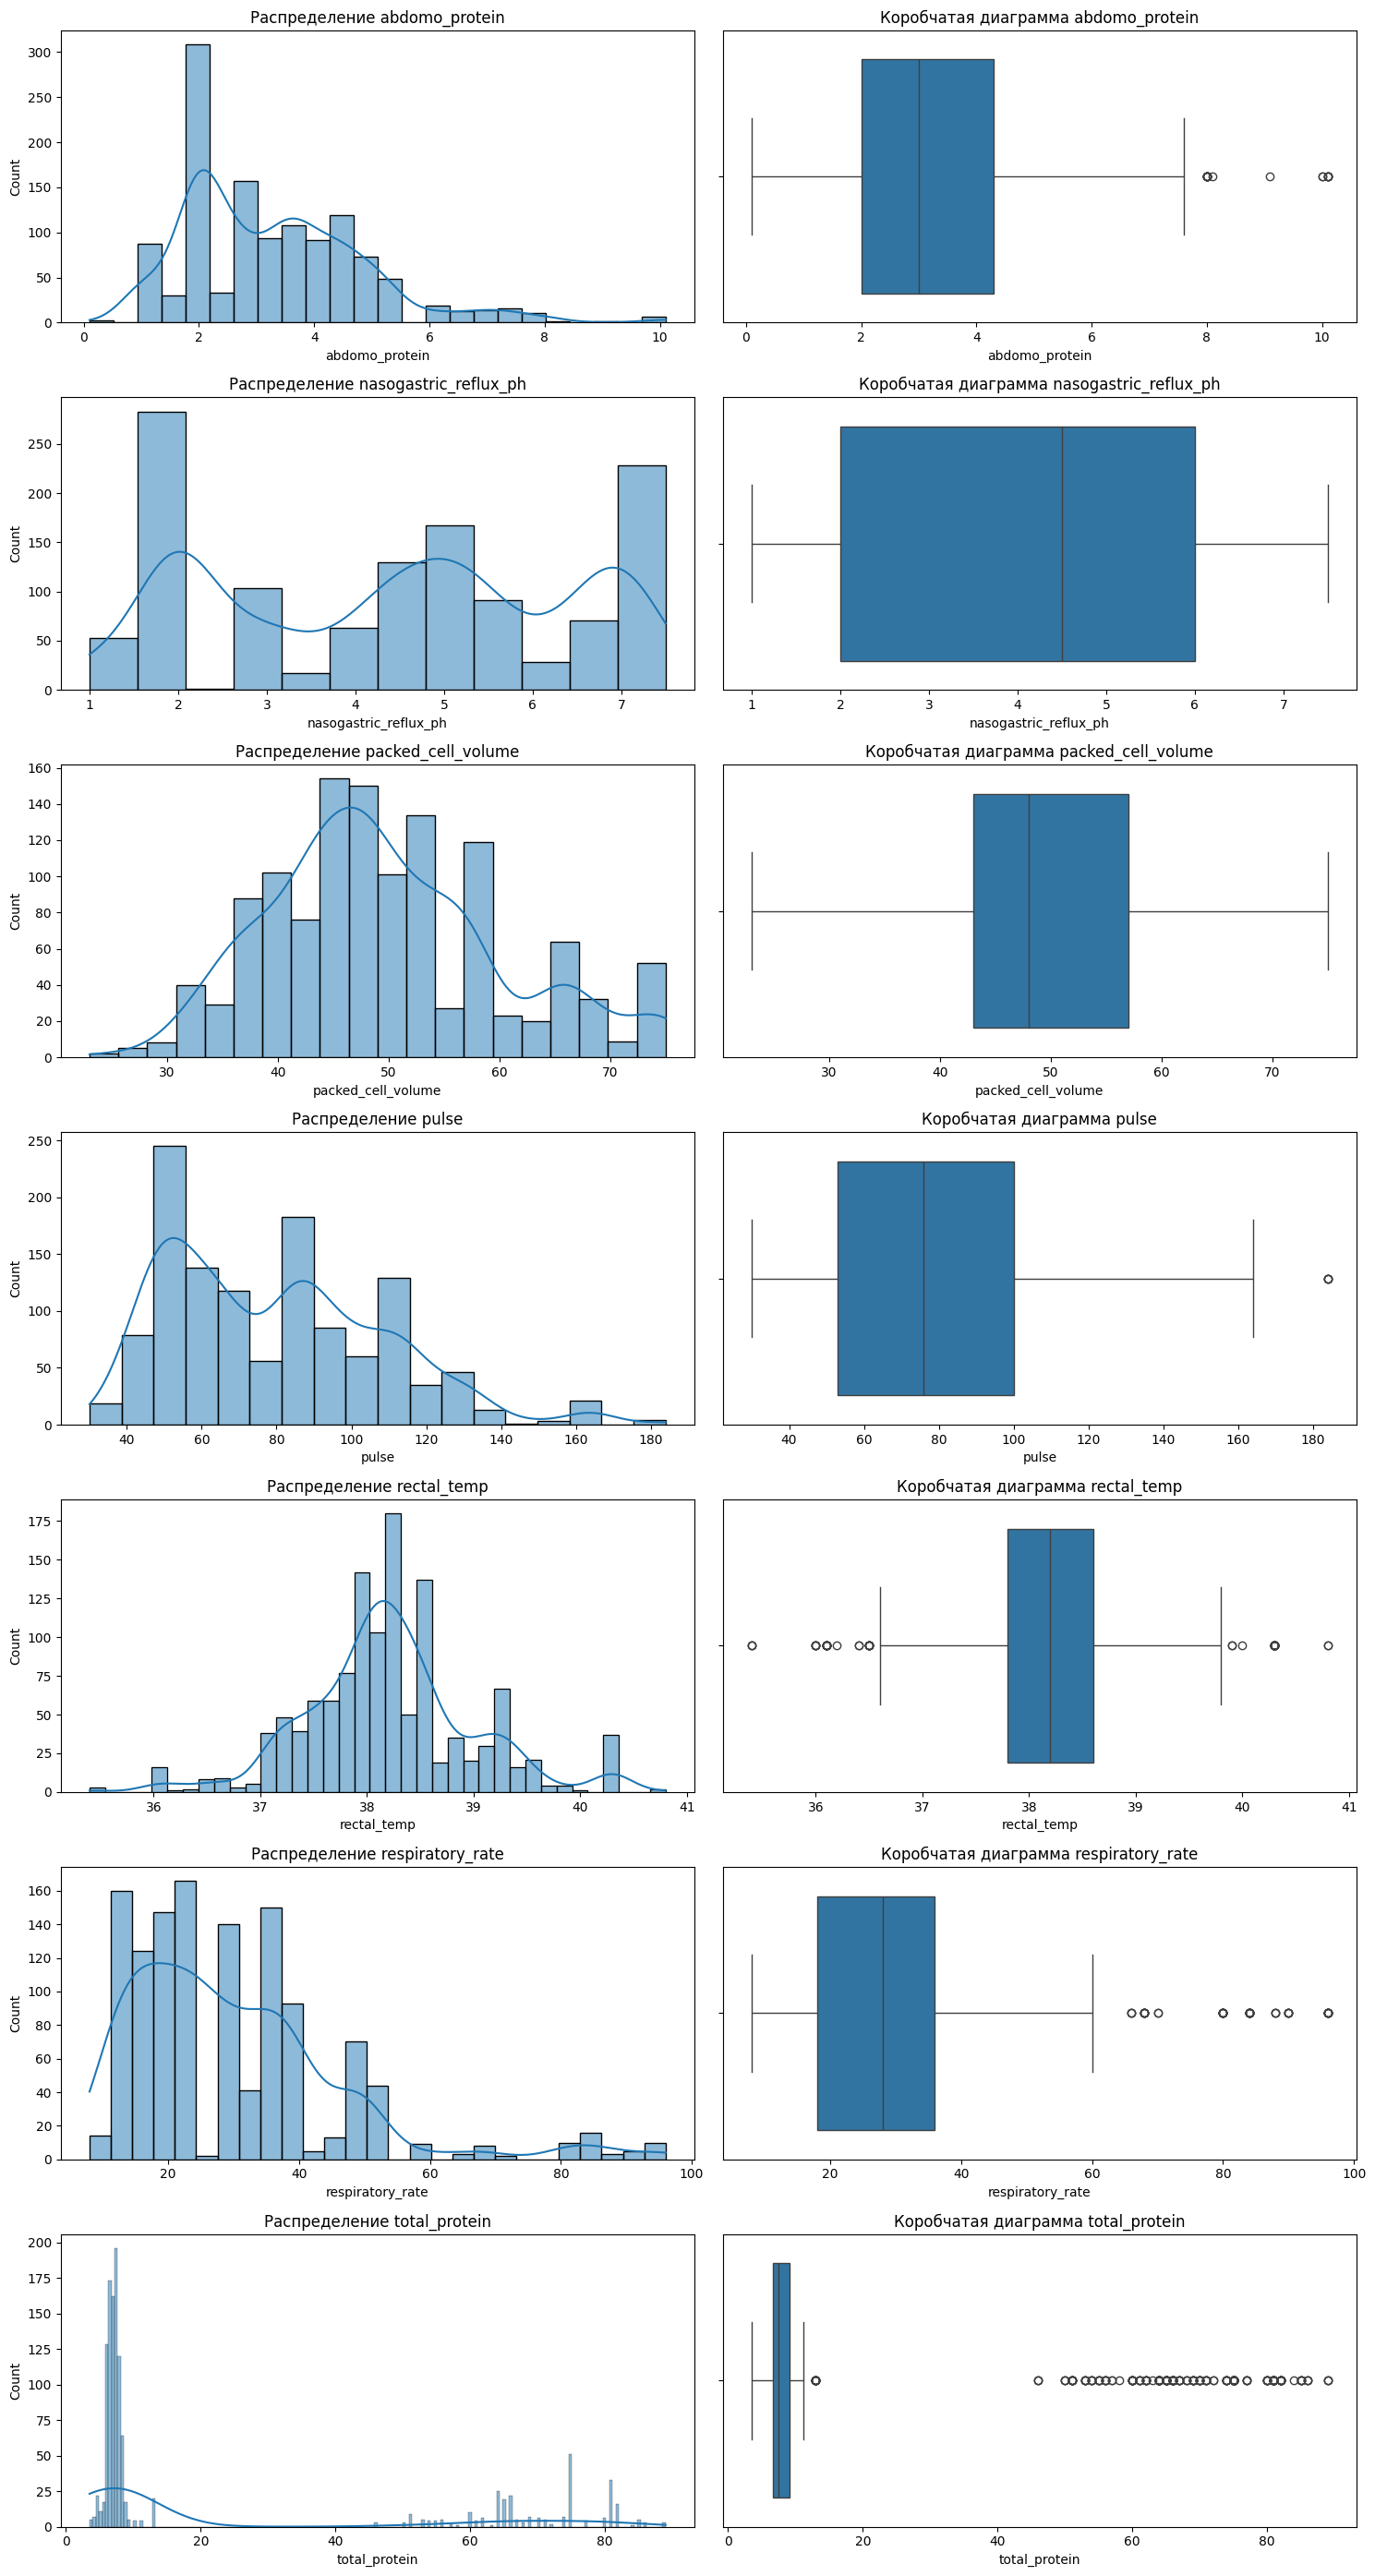

In [21]:
# Создаем таблицу с числовыми колонками
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

# Исключаем 'id', 'hospital_number', 'lesion_1', 'lesion_2', and 'lesion_3', как неинформативные значения
numerical_cols = numerical_cols.difference(['id', 'hospital_number', 'lesion_1', 'lesion_2', 'lesion_3'])

# Вычисляем значения фичей
fig, axs = plt.subplots(len(numerical_cols), 2, figsize=(15, 4 * len(numerical_cols)))

# Рисуем гистограммы и коробчатые диаграммы
for i, col in enumerate(numerical_cols):
    sns.histplot(train_data[col], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Распределение {col}')
    
    sns.boxplot(x=train_data[col], ax=axs[i, 1])
    axs[i, 1].set_title(f'Коробчатая диаграмма {col}')

plt.tight_layout()
plt.show()

# Выводы:
1. Практически на всех графиках есть выбросы, особенно на показателях общего белка (total_protein). В нашем случае, такие резкие отклонения от среднего значения могут характеризовать тяжесть болезни и не быть выбросами. Удаление этих выбросов может негативно отразится на показателях, характеризующих экстримальные состояния. Поэтому удалять выбросы не будем.
  

# Изучим категориальные признаки

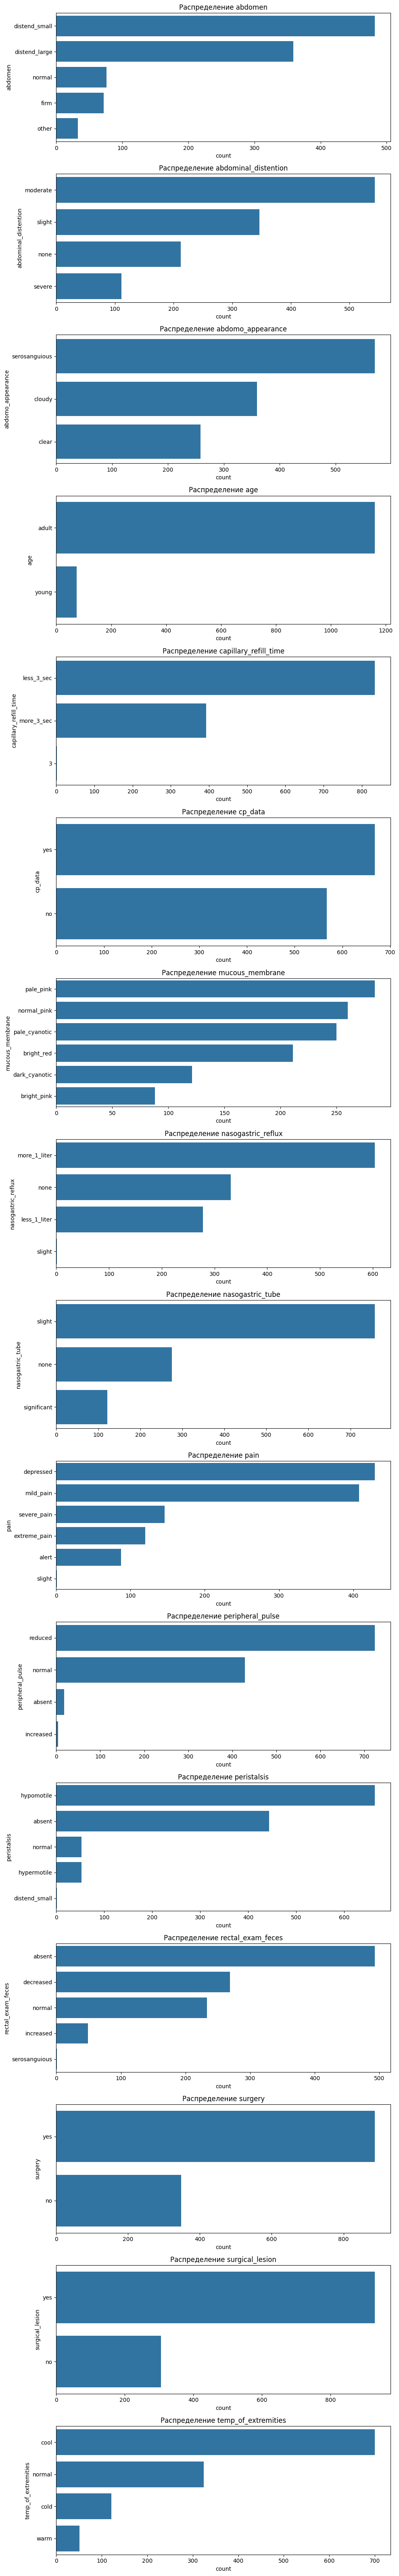

In [20]:
# Создаем таблицу с категориальными колонками
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Исключаем 'outcome' тк это исследуемая переменная
categorical_cols = categorical_cols.difference(['outcome'])

# Вычисляем значения фичей
fig, axs = plt.subplots(len(categorical_cols), 1, figsize=(10, 4 * len(categorical_cols)))

# Рисуем графики фичей
for i, col in enumerate(categorical_cols):
    sns.countplot(y=train_data[col], ax=axs[i], order = train_data[col].value_counts().index)
    axs[i].set_title(f'Распределение  {col}')

plt.tight_layout()
plt.show()

# Выводы:
1. В ветеринарную клинику привозят в основном взрослых лошадей в крайне тяжелом состоянии, о чем свидетельствуют данные с графика показателей температуры, пульса, объема кала. Около 60% лошадей привозят повторно. В более чем 75% случаев врачи оперируют лошадей. Лошадей привозят с острой болью в 60% случаев.



# Проверим корреляционные связи

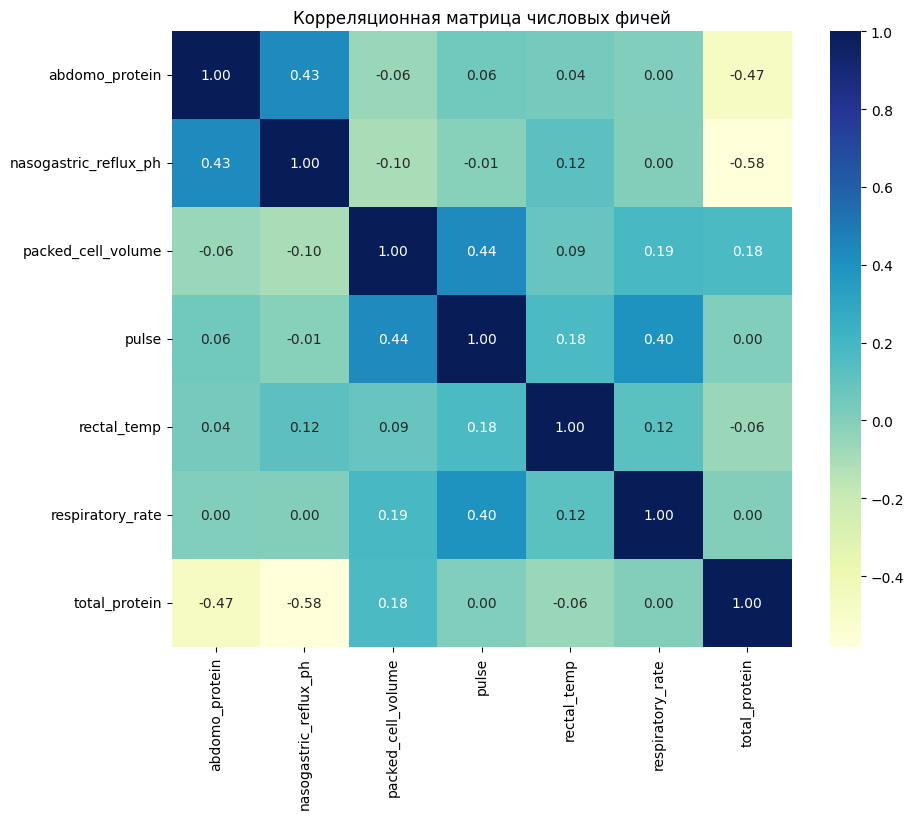

In [17]:
# Вычисляем корреляционную матрицу
correlation_matrix = train_data[numerical_cols].corr()

# Рисуем тепловую карту корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Корреляционная матрица числовых фичей')
plt.show()

# Выводы
1. Сильных коррялиционных связей между показателями не наблюдается. Средние корреляционные связи есть между показателями пульса и эритроцитов, общего белка и уровня РН рефлюкса

# Изучим статистику лечения

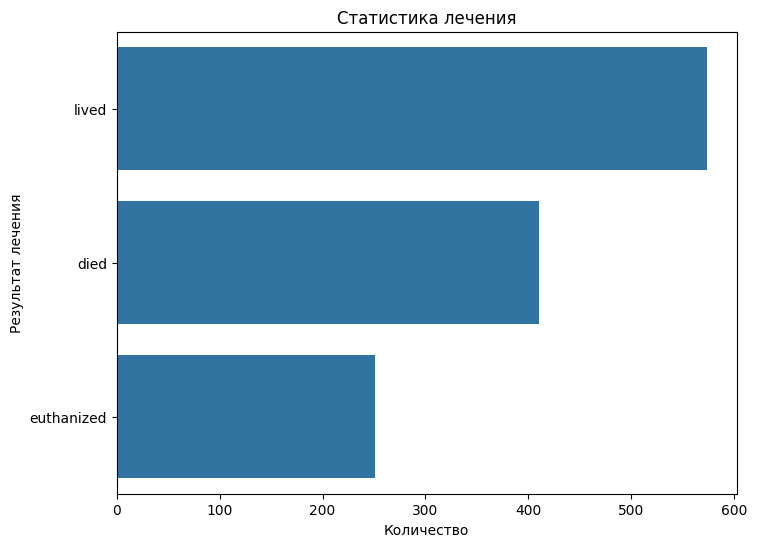

In [16]:
# Рисуем график "Статистика лечения"
plt.figure(figsize=(8, 6))
sns.countplot(y=train_data['outcome'], order=train_data['outcome'].value_counts().index)
plt.title('Статистика лечения')
plt.xlabel('Количество')
plt.ylabel('Результат лечения')
plt.show()

# Выводы
1. Выживаемость в клинике составляет 45% от получивших лечение. Около 25% лошадей были умервщелены через эфтаназию. 

# Изучим коробчатую диаграмму числовых фичей взависимости от результата лечения

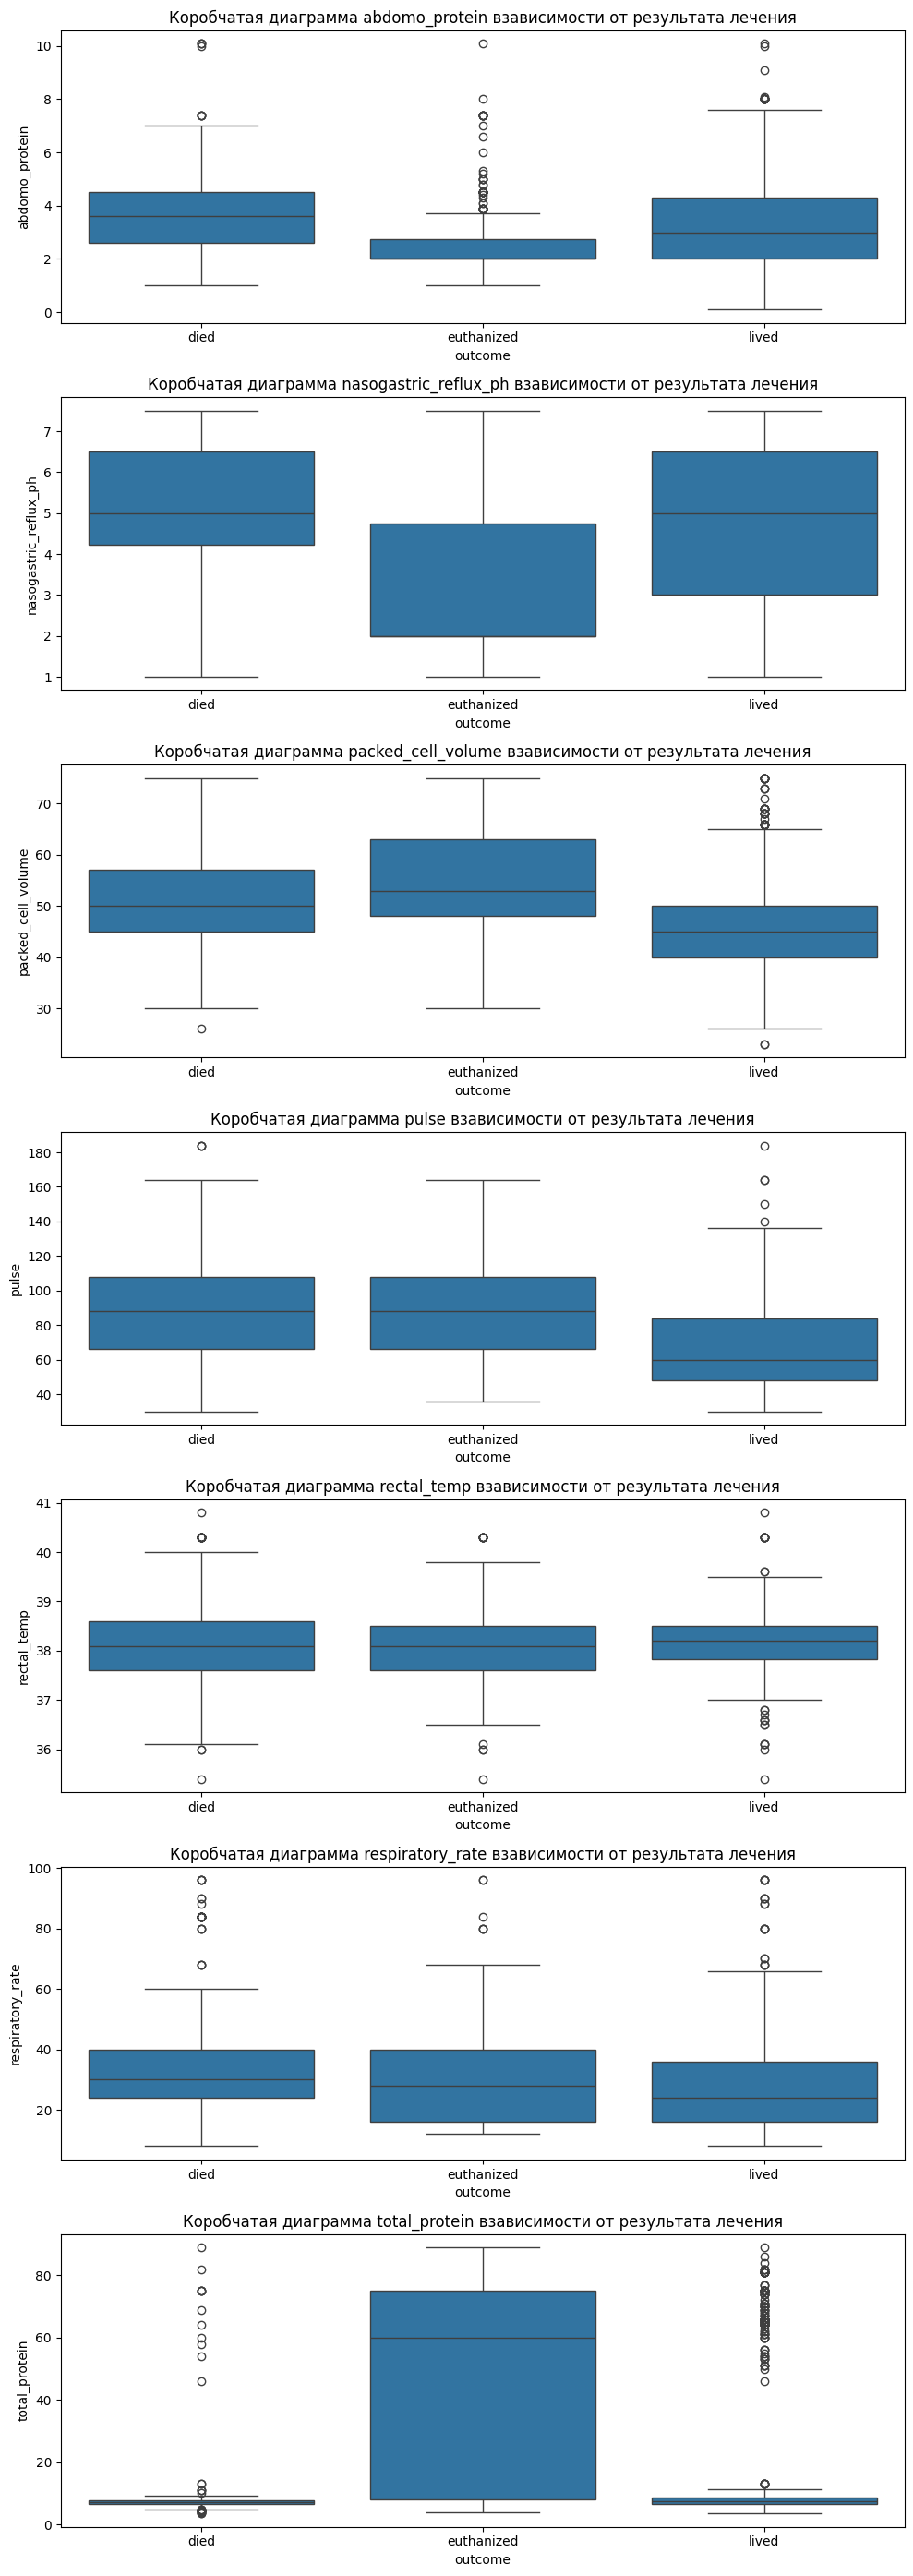

In [18]:
# Создаем числовые фичи
fig, axs = plt.subplots(len(numerical_cols), 1, figsize=(10, 4 * len(numerical_cols)))

# Рисуем коробчатую диаграмму числовых фичей взависимости от результата лечения
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=train_data['outcome'], y=train_data[col], ax=axs[i])
    axs[i].set_title(f'Коробчатая диаграмма {col} взависимости от результата лечения')

plt.tight_layout()
plt.show()

# Выводы
1. Показатели характеризующие выживаемость - это пульс и уровень эритроцитов. Другие показатели практически не изменяются при изменении выживаемости.

# Изучим категориальные фичи взависимости от результата лечения

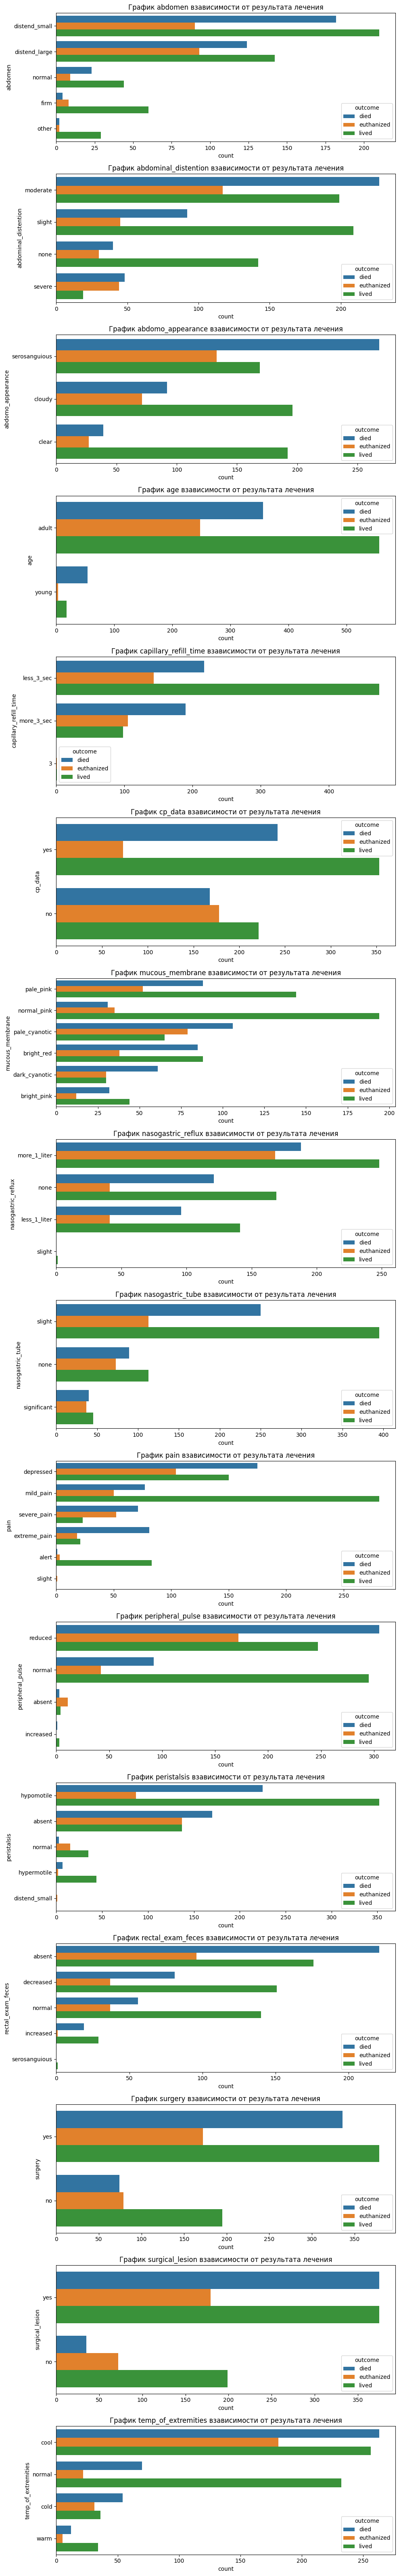

In [19]:
# Создаем категориальные фичи
fig, axs = plt.subplots(len(categorical_cols), 1, figsize=(10, 4 * len(categorical_cols)))

# Рисуем категориальные фичи взависимости от результата лечения
for i, col in enumerate(categorical_cols):
    sns.countplot(y=train_data[col], hue=train_data['outcome'], ax=axs[i], order=train_data[col].value_counts().index)
    axs[i].set_title(f'График {col} взависимости от результата лечения')

plt.tight_layout()
plt.show()

#  Выводы по анализу полученных данных
Основные пациенты клиники - это взрослые лошади (более 96%). Поэтому анализ молодых особей статистически не информативен.
1. Показатели пульса ('pulse') в среднем 60 ударов в минуту говорят о высокой вероятности выживаемости, 90 ударов в минуту - высокая вероятность смертности
2. Показатели эритроцитов ('packed_cell_volume') в среднем 45 говорят о высокой вероятности выживаемости, 52 - высокая вероятность смертности
3. Показатели абдоминоцентеза (abdomo_appearance) clear - говорят о высокой вероятности выживаемости, cloudy и serosanguinous высокая вероятность смертности
4. Показатели наполняемости капиляров кровью (capillary_refill_time)  less than 3 sec говорят о высокой вероятности выживаемости, more than 3 sec - высокая вероятность смертности
5. Показатели состояния регелярного опорожнения кишечника (rectal_examination_feces) normal и increased говорят о высокой вероятности выживаемости,
absent и decreased  - высокая вероятность смертности
6. Показатели боли (pain) - alert, no pain mild pain - говорят о высокой вероятности выживаемости, depressed и extreme_pain высокая вероятность смертности 
7. Показатели экстремальновысокой температуры  (temp_of_extremities) Normal и Warm говорят о высокой вероятности выживаемости, Cool и Cold высокая вероятность смертности